<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/MatematicasCienciasDeLosDatos/TP3/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matemáticas para Ciencias de los Datos
## Ejemplo mínimos cuadrados para un problema de regresión

Profesora: María Auxiliadora Mora

In [1]:
# Libraries required 
import torch as torch
import numpy as np
import math

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


## Objetivo
El objetivo del ejemplo es repasar aspectos básicos del algoritmo de mínimos cuadrados aplicado a un ejemplo de regresión.

## Actividad
1. Se generará un conjunto de datos ejemplo. 

2. Se estimará el vector de pesos óptimo utilizando mínimos cuadrados.

3. Se estimarán las salidas implementando la función forward que permita realizar la regresión lineal.

4. Se evaluará el error, es decir la distancia euclidiana entre la estimación y sus etiquetas.


# 1) Generar conjuntos de datos
Con sklearn se genera un problema random de regresión usando la función make_regression.

Algunos parámetros:

- n_samples int, default=100. Número de muestras.

- n_features int, default=100. El número de atributos.

- n_informative int, default=10.  La cantidad de características informativas, es decir, la cantidad de características utilizadas para construir el modelo lineal utilizado para generar la salida. 

- bias float, default=0.0. El bias en el modelo lineal subyacente. 

- noise float, default=0.0. La desviación estándar del ruido gaussiano aplicado a la salida. 

- random_state: Determina la generación de números aleatorios para la creación de conjuntos de datos. Pase un int para una salida reproducible en múltiples llamadas a funciones.


In [10]:
X, y = make_regression(n_features=1, n_informative=1,
                       bias=1, noise=20, random_state=10)

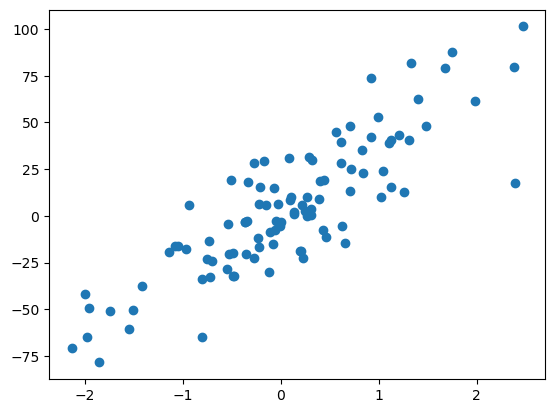

In [11]:
# Data visualization
plt.scatter(X, y)

# 2) Se estima el vector de pesos óptimo utilizando mínimos cuadrados

In [12]:
def estimateOptimumW(TargetsAll, SamplesAll):
    """ 
    Estimate the optimum W with least squares
    :param TargetsAll, a tensor with the targets.
    :param SamplesAll, a tensor with samples. 
    return 
       wOpt, array with optimum weights
    """
    # Calculate w = Apinverse*Targets
    samplesAllPinv = torch.tensor(np.linalg.pinv(SamplesAll))
    wOpt = samplesAllPinv.mm(TargetsAll)
    return wOpt
 

# The data is converted to Pytorch tensors.    
TargetsAll = torch.tensor(y)
SamplesAll = torch.tensor(X)

# The targets are adjusted to be able to compute the multiplication. 
TargetsAll=TargetsAll.reshape([TargetsAll.shape[0],1])
    
# Optimun w for sample data  
wOpt = estimateOptimumW( TargetsAll, SamplesAll)


# 3) Se estiman las salidas implementando la función forward 
La función forward estima las salidas, del modelo al hacer  $T =X\,\vec{w}_{opt}$

In [13]:
def forward(SamplesAll, wOpt):
    """
    Get model output
    param: SamplesAll, a matrix with dimensions NumSamples x NumDimensions 
    return: Estimates the model outputs activation function 
    """
    EstimatedTargets = SamplesAll.mm(wOpt)
    
    return EstimatedTargets

# Estimated target for sample data    
EstimatedTargetsAll = forward(SamplesAll, wOpt)



# 4) Se evalúa la distancia euclidiana entre la estimación y sus etiquetas para calcular el error.

In [14]:
def evaluateError(TargetsAll, EstimatedTargetsAll):
    """
    Evaluate model error using the euclidian distance.
    param TargetsAll, real targets
    param EstimatedTargets
    """
    error = torch.norm(TargetsAll - EstimatedTargetsAll, 2)
    return error
  
  
# Error for sample data  
error = evaluateError(TargetsAll, EstimatedTargetsAll)



# 5) Se visualizan los resultados y se reporta el error 

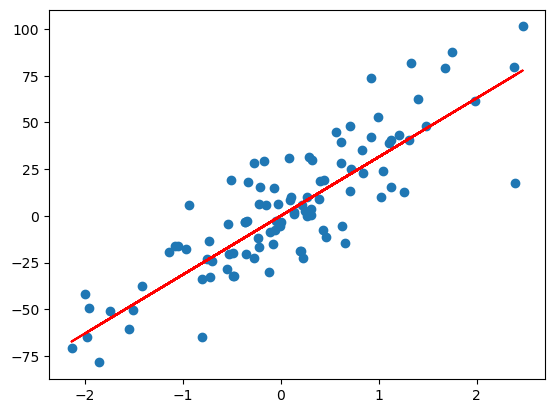

In [15]:
def plotBestFitLine(X, y, EstimatedTargetsAll):
    """
    Plot the best fit line using wOpt, the samples and targets.
    param: 
        X: Values on the X axis. 
        y: y values.  
        EstimatedTargetsAll: model with estimated values.
    """

    plt.scatter(X, y)
    plt.plot(X, EstimatedTargetsAll.numpy(), color='red')

    
plotBestFitLine(X, y, EstimatedTargetsAll) 

In [91]:
print(error)

tensor(454.7783, dtype=torch.float64)
